In [1]:
import flowx
from qiskit.visualization import plot_histogram

In [2]:
nx, ny = 4, 4
xmin, xmax = -0.8, 0.5
ymin, ymax = -0.8, 0.5

center_vars   = ['lset']

particle_info = [dict(input='HDF5', file='sm_tshape.h5')]

quantum_info = dict(simulator = 'QASM', 
                    qubits = 4, repeat = 1, circuit = 'grover', 
                    backend = 'ibmq_burlington', calibrate = True)

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax, 
                                                                   center_vars, particle_info=particle_info)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

grover = flowx.quantum_main(domain_data_struct, quantum_info=quantum_info)

Running on device:  qasm_simulator
Job Status: job has successfully run


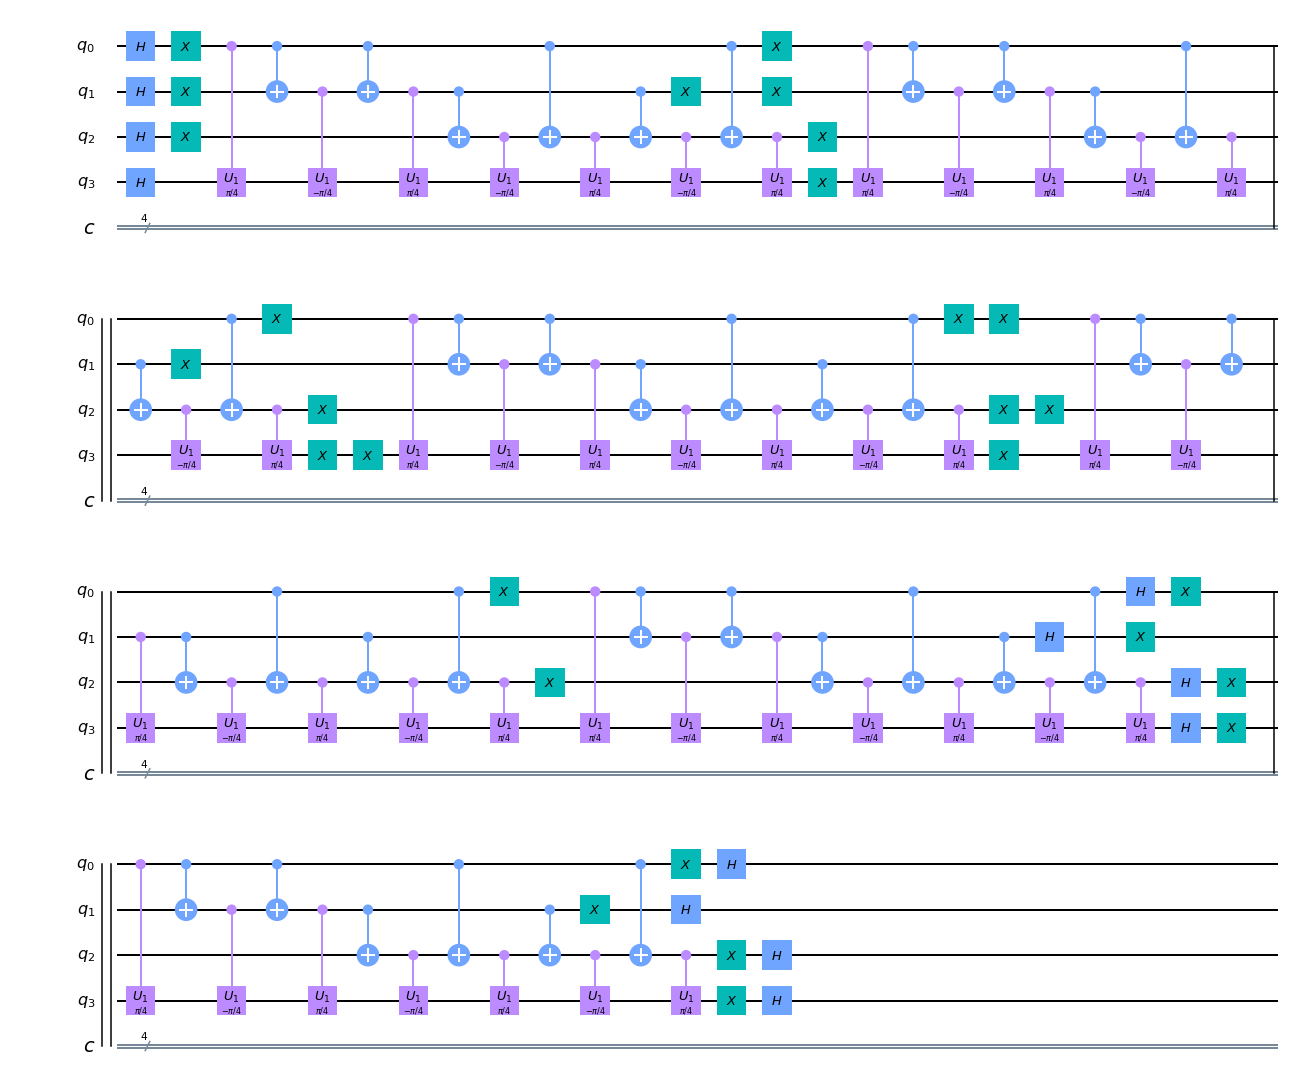

In [3]:
particles[0].rotate(45)
grover.setup_circuit()
grover.circuit.draw(output="mpl")

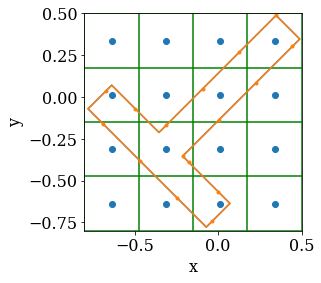

In [4]:
flowx.io.plot_mesh_mapped(gridc, particles[0])

Job Status: job has successfully run


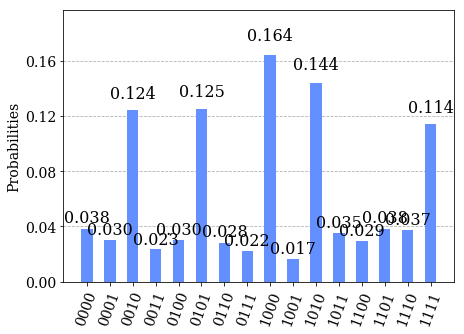

In [5]:
results, answer = grover.run_circuit()
plot_histogram(answer['noisy'])

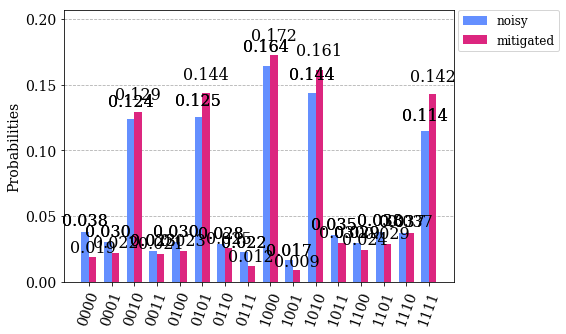

In [6]:
plot_histogram([answer['noisy'], answer['mitigated']], legend=['noisy', 'mitigated'])